In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import profile 

In [2]:
# Genre counts 
# latest books with highest reviews and price
# Highest price   
# most popular books
# Most reviewed

In [3]:
data=pd.read_csv('bestsellers with categories.csv')   # Amazon books rating
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [5]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

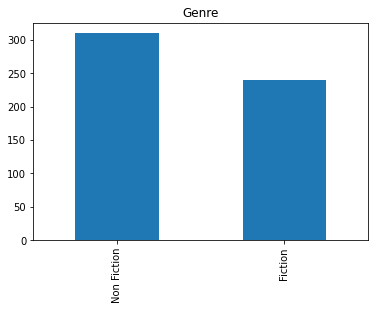

In [6]:
data['Genre'].value_counts().plot(kind='bar',title='Genre')

In [7]:
data['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [8]:
data.sort_values('Year',ascending=False)


,Name,Author,User Rating,Reviews,Price,Year,Genre
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction
294,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,4.8,23047,6,2019,Non Fiction
489,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2019,Fiction
263,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,10820,5,2019,Non Fiction
130,"Girl, Wash Your Face: Stop Believing the Lies ...",Rachel Hollis,4.6,22288,12,2019,Non Fiction
...,...,...,...,...,...,...,...
418,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction
38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction
139,Good to Great: Why Some Companies Make the Lea...,Jim Collins,4.5,3457,14,2009,Non Fiction


In [44]:
# latest books with highest reviews, price
latest=data.groupby('Year')
latest=latest[['Name','Year','Reviews','User Rating','Price']].get_group(2019)
latest.sort_values('Reviews',ascending=False).head(1)

,Name,Year,Reviews,User Rating,Price
534,Where the Crawdads Sing,2019,87841,4.8,15


In [45]:
latest.sort_values('Price',ascending=False).head(1)

,Name,Year,Reviews,User Rating,Price
267,Player's Handbook (Dungeons & Dragons),2019,16990,4.8,27


In [28]:
# Highest price  
data.sort_values('Price', ascending=False).iloc[0]

Name           Diagnostic and Statistical Manual of Mental Di...
Author                          American Psychiatric Association
User Rating                                                  4.5
Reviews                                                     6679
Price                                                        105
Year                                                        2013
Genre                                                Non Fiction
Name: 69, dtype: object

In [29]:
data.sort_values('Price',ascending=False).head() 

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction


In [53]:
# Most Reviewed
data.groupby(['Author','Name', 'Genre'],as_index=False)[['User Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

,Author,Name,Genre,User Rating,Reviews
87,Delia Owens,Where the Crawdads Sing,Fiction,4.8,87841.0
243,Paula Hawkins,The Girl on the Train,Fiction,4.1,79446.0
231,Michelle Obama,Becoming,Non Fiction,4.8,61133.0
128,Gillian Flynn,Gone Girl,Fiction,4.0,57271.0
182,John Green,The Fault in Our Stars,Fiction,4.7,50482.0
200,Kristin Hannah,The Nightingale: A Novel,Fiction,4.8,49288.0
100,E L James,Fifty Shades of Grey: Book One of the Fifty Sh...,Fiction,3.8,47265.0
15,Andy Weir,The Martian,Fiction,4.7,39459.0
21,Anthony Doerr,All the Light We Cannot See,Fiction,4.6,36348.0
245,Paulo Coelho,The Alchemist,Fiction,4.7,35799.0


c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


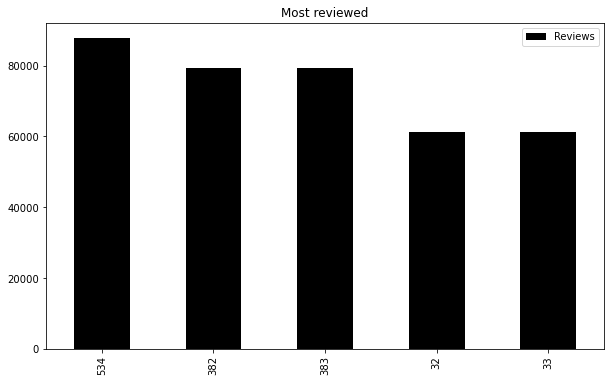

In [26]:

review=data.sort_values('Reviews',ascending=False)
review[['Name','Author','Reviews']].head().plot(kind='bar', color='Black' , title='Most reviewed',figsize=(10,6))

In [50]:
# most popular books
data.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)

,Name,Author,Genre,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105.0
307,The Twilight Saga Collection,Stephenie Meyer,Fiction,82.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,54.0
228,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,53.0
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,52.0
191,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,46.0
333,Watchmen,Alan Moore,Fiction,42.0
281,The Official SAT Study Guide,The College Board,Non Fiction,40.0
220,The Alchemist,Paulo Coelho,Fiction,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,Non Fiction,36.0


In [47]:
# auto EDA
from pandas_profiling import ProfileReport

In [48]:
Profile=ProfileReport(data,title='pandas eda report',explorative=True)

In [49]:
Profile.to_file('Amazon book analysis.html')